In [189]:
# load inputs lines from day08.txt
with open('day08.txt', 'r') as f:
    lines = f.readlines()
    inputs = [line.strip() for line in lines]


In [190]:
# seven-segment displays 
# For example, here is what you might see in a single entry in your notes:
# acedgfb cdfbe gcdfa fbcad dab cefabd cdfgeb eafb cagedb ab |
# cdfeb fcadb cdfeb cdbaf
# (The entry is wrapped here to two lines so it fits; in your notes, it will all be on a single line.)
# Each entry consists of ten unique signal patterns, a | delimiter, and finally the four digit output value. Within an entry, the same wire/segment connections are used (but you don't know what the connections actually are). The unique signal patterns correspond to the ten different ways the submarine tries to render a digit using the current wire/segment connections. Because 7 is the only digit that uses three segments, dab in the above example means that to render a 7, signal lines d, a, and b are on. Because 4 is the only digit that uses four segments, eafb means that to render a 4, signal lines e, a, f, and b are on.
def entrys_to_patterns_and_outputs(inputs):
    patterns, outputs = [], []
    for entry in inputs:
        [pattern,output] = entry.split(' | ')
        pattern = pattern.split()
        output = output.split()
        patterns.append(pattern)
        outputs.append(output)
    return patterns, outputs

patterns, outputs = entrys_to_patterns_and_outputs(inputs)
print(patterns[0], outputs[0])


# Because the digits 1, 4, 7, and 8 each use a unique number of segments, you should be able to tell which combinations of signals correspond to those digits. Counting only digits in the output values (the part after | on each line), in the above example, there are 26 instances of digits that use a unique number of segments (highlighted above).

# seven-segment displays, length to number
# '0' digits length is 6
# '1' digits length is 2
# '2' digits length is 5
# '3' digits length is 5
# '4' digits length is 4
# '5' digits length is 5
# '6' digits length is 6
# '7' digits length is 3
# '8' digits length is 7
# '9' digits length is 6
def segments_is_1478(segments):
    """
    >>> segments_is_1478('acdfebg') # length of segments is not in set(2,4,3,7)
    True
    >>> segments_is_1478('acdfeb') # length of segments is not in set(2,4,3,7)
    False
    """
    return len(segments) in set([2,4,3,7])

# In the output values, how many times do digits 1, 4, 7, or 8 appear?
count_of_1478 = 0
for output in outputs:
    count_of_1478 += sum([segments_is_1478(segments) for segments in output]) 
print(count_of_1478)

['cefbd', 'dcg', 'dcfgbae', 'bdeafg', 'gfcaed', 'ecbgd', 'bcag', 'bdacge', 'cg', 'bedag'] ['cebdg', 'egcfda', 'gdacbe', 'badefg']
274


In [192]:
from cpmpy import *
import numpy as np
import copy

# --- Part Two ---

# Each digit of a seven-segment display is rendered by turning on or off any of seven segments named a through g:

#   0:      1:      2:      3:      4:
#  aaaa    ....    aaaa    aaaa    ....
# b    c  .    c  .    c  .    c  b    c
# b    c  .    c  .    c  .    c  b    c
#  ....    ....    dddd    dddd    dddd
# e    f  .    f  e    .  .    f  .    f
# e    f  .    f  e    .  .    f  .    f
#  gggg    ....    gggg    gggg    ....

#   5:      6:      7:      8:      9:
#  aaaa    aaaa    aaaa    aaaa    aaaa
# b    .  b    .  .    c  b    c  b    c
# b    .  b    .  .    c  b    c  b    c
#  dddd    dddd    ....    dddd    dddd
# .    f  e    f  .    f  e    f  .    f
# .    f  e    f  .    f  e    f  .    f
#  gggg    gggg    ....    gggg    gggg
digits = { 0: [1,1,1,1,1,1,0],
    1: [0,1,1,0,0,0,0], # 2
    2: [1,1,0,1,1,0,1],
    3: [1,1,1,1,0,0,1],
    4: [0,1,1,0,0,1,1], # 4
    5: [1,0,1,1,0,1,1],
    6: [1,0,1,1,1,1,1],
    7: [1,1,1,0,0,0,0], # 3
    8: [1,1,1,1,1,1,1], # 7
    9: [1,1,1,1,0,1,1]}

# acedgfb cdfbe gcdfa fbcad dab cefabd cdfgeb eafb cagedb ab | cdfeb fcadb cdfeb cdbaf
# After some careful analysis, the mapping between signal wires and segments only make sense in the following configuration:
# So, to render a 1, only segments c and f would be turned on; the rest would be off. To render a 7, only segments a, c, and f would be turned on.
#  dddd
# e    a
# e    a
#  ffff
# g    b
# g    b
#  cccc
def segment_to_digits(segment):
    """
    >>> segments_to_digits('cdfeb')
    [0, 1, 1, 1, 1, 1, 0]
    """
    digits = [0]*7
    for c in segment:
        # a to 1 .. b to 2 .. c to 3 .. d to 4 .. e to 5 .. f to 6
        digits[ord(c)-ord('a')] = 1
    return digits
print(segment_to_digits('acdebg'))

def mask_digits_by_num(num, digits):
    new_digits = copy.deepcopy(digits) 
    mask = digits[num]
    # print each key value pair in digits
    for k, digit in new_digits.items():
        for i in reversed(range(len(mask))):
            if mask[i] == 1:
                del digit[i]
    return new_digits

new_digits = mask_digits_by_num(1, digits)

# possible patterns and outputs
p_pat = ['0123456789'] * (len(patterns[0])+len(outputs[0]))
for i in range(len(patterns)):
    line  = patterns[i] + outputs[i]
    c_line  = list(map(len, line))

# So, the unique signal patterns would correspond to the following digits:

# acedgfb: 8
# cdfbe: 5
# gcdfa: 2
# fbcad: 3
# dab: 7
# cefabd: 9
# cdfgeb: 6
# eafb: 4
# cagedb: 0
# ab: 1

# Then, the four digits of the output value can be decoded:
# cdfeb: 5
# fcadb: 3
# cdfeb: 5
# cdbaf: 3
# Therefore, the output value for this entry is 5353.

# Following this same process for each entry in the second, larger example above, the output value of each entry can be determined:

# fdgacbe cefdb cefbgd gcbe: 8394
# fcgedb cgb dgebacf gc: 9781
# cg cg fdcagb cbg: 1197
# efabcd cedba gadfec cb: 9361
# gecf egdcabf bgf bfgea: 4873
# gebdcfa ecba ca fadegcb: 8418
# cefg dcbef fcge gbcadfe: 4548
# ed bcgafe cdgba cbgef: 1625
# gbdfcae bgc cg cgb: 8717
# fgae cfgab fg bagce: 4315
# Adding all of the output values in this larger example produces 61229.

# For each entry, determine all of the wire/segment connections and decode the four-digit output values. What do you get if you add up all of the output values?

[1, 1, 1, 1, 1, 0, 1]


In [193]:
digits = { 0: [1,1,1,1,1,1,0],
    1: [0,1,1,0,0,0,0], # 2
    2: [1,1,0,1,1,0,1],
    3: [1,1,1,1,0,0,1],
    4: [0,1,1,0,0,1,1], # 4
    5: [1,0,1,1,0,1,1],
    6: [1,0,1,1,1,1,1],
    7: [1,1,1,0,0,0,0], # 3
    8: [1,1,1,1,1,1,1], # 7
    9: [1,1,1,1,0,1,1]}

print( ' ', ' ',end=': ')
for k in digits.keys():
    print(k, digits[k].count(1), end='; ')
print()

l = [1,4,7]
for num in l:
    new_digits = mask_digits_by_num(num, digits)
    print(num, ' ',end=': ')
    for k in new_digits.keys():
        print(k, new_digits[k].count(1), end='; ')
    print()


for i in range(3):
    #remove the num from [1,4,7,8]
    num = l.pop(0)
    for num2 in l:
        new_digits = mask_digits_by_num(num, digits)
        new_digits = mask_digits_by_num(num2, new_digits)
        print(num, num2,end=': ')
        for k in new_digits.keys():
            print(k, new_digits[k].count(1), end='; ')
        print()

   : 0 6; 1 2; 2 5; 3 5; 4 4; 5 5; 6 6; 7 3; 8 7; 9 6; 
1  : 0 4; 1 0; 2 4; 3 3; 4 2; 5 4; 6 5; 7 1; 8 5; 9 4; 
4  : 0 3; 1 0; 2 3; 3 2; 4 0; 5 2; 6 3; 7 1; 8 3; 9 2; 
7  : 0 3; 1 0; 2 3; 3 2; 4 2; 5 3; 6 4; 7 0; 8 4; 9 3; 
1 4: 0 3; 1 0; 2 3; 3 2; 4 0; 5 2; 6 3; 7 1; 8 3; 9 2; 
1 7: 0 3; 1 0; 2 3; 3 2; 4 2; 5 3; 6 4; 7 0; 8 4; 9 3; 
4 7: 0 2; 1 0; 2 2; 3 1; 4 0; 5 1; 6 2; 7 0; 8 2; 9 1; 


In [194]:
def is_last_4_finished(p_pat):
    return all(len(p)==1 for p in p_pat[-4:])

magic = lambda nums: int(''.join(str(i) for i in nums))

outputs_num = [0]*len(outputs)
for i in range(len(patterns)):
    line  = patterns[i] + outputs[i]
    c_line  = list(map(len, line))
    count1 = lambda x : (x[0], x[1].count(1))
    len_map = dict(map(count1, digits.items()))
    # get list while values are the same
    same_values = lambda n: set(k for k,v in len_map.items() if v == n)
    p_pat = []
    for l in c_line:
        p_pat.append(same_values(l))
    for index,num in [(i, list(s)[0]) for i,s in enumerate(p_pat) if len(s) == 1 ]:
        # print(num)
        new_digits = mask_digits_by_num(num, digits)
        len_map = dict(map(count1, new_digits.items()))
        mask1 = set(line[index])
        c_line=[len(set(l) - mask1) for l in line]
        # print(len_map, index,mask1, c_line)
        p_pat1 = []
        for l in c_line:
            p_pat1.append(same_values(l))
        p_pat = [ a&b for a,b in zip(p_pat1, p_pat)]
        if(is_last_4_finished(p_pat)):
            outputs_num[i] = magic([ c.pop() for inx,c in enumerate(p_pat[-4:])])
            break

sum(outputs_num),min(outputs_num),max(outputs_num)


(1012089, 58, 9994)

In [177]:
#convert a list of digits sets to number
# digits = [{1},{2},{3},{4}] -> 1234
def digits_sets_to_num(digits):
    num = 0
    rdigits = digits[::-1]
    for i in range(len(digits)):
        num += rdigits[i].pop()*10**i
    return num
digits = [{1},{2},{3},{4}] 
print(digits_sets_to_num(digits))



[{4}, {3}, {2}, {1}]
1234


Digit count: 1
            with_map: 1.73 usec/pass
  with_interpolation: 2.05 usec/pass
         with_genexp: 3.30 usec/pass
            with_sum: 2.79 usec/pass
         with_reduce: 1.21 usec/pass
       with_builtins: 1.79 usec/pass
    with_accumulator: 0.34 usec/pass
Digit count: 3
            with_map: 1.73 usec/pass
  with_interpolation: 3.20 usec/pass
         with_genexp: 2.30 usec/pass
            with_sum: 2.85 usec/pass
         with_reduce: 2.00 usec/pass
       with_builtins: 2.39 usec/pass
    with_accumulator: 0.55 usec/pass
Digit count: 5
            with_map: 1.99 usec/pass
  with_interpolation: 3.07 usec/pass
         with_genexp: 2.79 usec/pass
            with_sum: 4.83 usec/pass
         with_reduce: 3.27 usec/pass
       with_builtins: 3.60 usec/pass
    with_accumulator: 0.92 usec/pass
Digit count: 7
            with_map: 2.35 usec/pass
  with_interpolation: 3.29 usec/pass
         with_genexp: 3.35 usec/pass
            with_sum: 6.82 usec/pass
         with_r

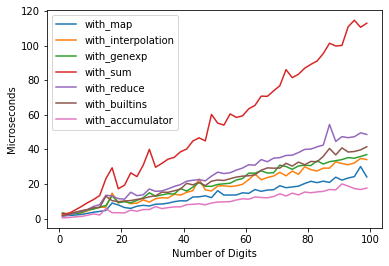

In [187]:
import collections
import random
import timeit

import matplotlib.pyplot as pyplot
from functools import reduce


MICROSECONDS_PER_SECOND = 1E6
FUNS = []
def test_fun(fun):
    FUNS.append(fun)
    return fun

@test_fun
def with_map(nums):
    return int(''.join(map(str, nums)))

@test_fun
def with_interpolation(nums):
    return int(''.join('%d' % num for num in nums))

@test_fun
def with_genexp(nums):
    return int(''.join(str(num) for num in nums))

@test_fun
def with_sum(nums):
    return sum(digit * 10 ** (len(nums) - 1 - i)
        for i, digit in enumerate(nums))

@test_fun
def with_reduce(nums):
    return int(reduce(lambda x, y: x + str(y), nums, ''))

@test_fun
def with_builtins(nums):
    return int(''.join(filter(str.isdigit, repr(nums))))

@test_fun
def with_accumulator(nums):
    tot = 0
    for num in nums:
        tot *= 10
        tot += num
    return tot

def time_test(digit_count, test_count=10000):
    """
    :return: Map from func name to (normalized) microseconds per pass.
    """
    print ('Digit count:', digit_count)
    nums = [random.randrange(1, 10) for i in iter(range(digit_count))]
    stmt = 'to_int(%r)' % nums
    result_by_method = {}
    for fun in FUNS:
        setup = 'from %s import %s as to_int' % (__name__, fun.__name__)
        t = timeit.Timer(stmt, setup)
        per_pass = t.timeit(number=test_count) / test_count
        per_pass *= MICROSECONDS_PER_SECOND
        print ('%20s: %.2f usec/pass' % (fun.__name__, per_pass))
        result_by_method[fun.__name__] = per_pass
    return result_by_method

if __name__ == '__main__':
    pass_times_by_method = collections.defaultdict(list)
    assert_results = [fun([1, 2, 3]) for fun in FUNS]
    assert all(result == 123 for result in assert_results)
    digit_counts = range(1, 100, 2)
    for digit_count in digit_counts:
        for method, result in time_test(digit_count).items():
            pass_times_by_method[method].append(result)
    for method, pass_times in pass_times_by_method.items():
        pyplot.plot(digit_counts, pass_times, label=method)
    pyplot.legend(loc='upper left')
    pyplot.xlabel('Number of Digits')
    pyplot.ylabel('Microseconds')
    pyplot.show()